<!-- <img src='img/fastcamp_h.png'> -->

# 5. Deep Learning from Basic Method 2 with Keras

# AI의 겨울

* perceptron이 이렇게 강력했지만 이후 ai는 20년에 가까운 시간 동안 "AI Winter"라는 시기를 겪음
* 왜 그럴까?

# XOR PROBLEM; 비선형 문제

<img src='img/05_01.png' width=50% height=50%>

* 기존의 AND 문제, OR 문제는 방정식 1개로 (선형으로) 문제를 해결 할 수 있었음
* 그러나 XOR는 1개의 방정식으로 해결 할 수 없음
  * 이 문제를 perceptron은 절대 해결 할 수 없기 때문에 AI winter가 찾아옴
  * 1969년 Marvin Minsky와 Seymour Papert의 “Perceptrons: an introduction to computational geometry”

# Multi-Layer Perceptron(MLP) 의 등장

* 1986년 McClelland, James L., David E. Rumelhart, and **Geoffrey E. Hinton**이 MLP를 발표
* 이전 perceptron의 출력을 또다른 perceptron의 입력으로 사용하고 현재 출력에 비선형 step function을 사용하여 MLP가 비선형으로 동작하게 함

# 선형 분류와 비선형 분류의 차이

<center><img src='img/05_03.png'></center>

# 다시보는 Perceptron의 구조

<center><img src='img/03_01.png'></center>

* input($x_n$): 외부에서 들어오는 입력, 보통 vector, matrix
* weight($w_n$): x와 곱해지는 가중치, DL에서 구해야하는 값
* bias($1$): 바이어스, 절편 값
* sigma: x와 w의 곱 + bias의 합을 출력
* step function: 해당 출력의 활성 여부를 결정

# Multi-Layer Perceptron의 구조

<center><img src='img/05_02.png'></center>

* input layer: 외부에서 들어오는 입력, 보통 vector, matrix
* hidden layer:
 1. 각 노드는 이전 layer의 출력을 입력으로 받음
 2. hidden layer의 각 노드는 step funtion을 가짐
 3. hidden layer는 여러장 올 수 있음
<br><br>
* hidden layer의 각 노드
 * weight($w_n$): 이전 입력과 곱해지는 가중치, DL에서 구해야하는 값
 * bias($1$): 바이어스, 절편 값
 * sigma: 입력과 w의 곱 + bias의 합을 출력
 * activation/step function: 해당 출력의 활성 여부를 결정

In [19]:
import keras
from keras.layers import Dense
from keras.models import Sequential
import numpy as np

model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse')

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])
hist = model.fit(X, Y, epochs=3000, verbose=0)

H = (model.predict(X) > 0.5).astype(np.float32)
for loss in hist.history['loss'][::300]:
    print('오차:', loss)
print('정확도:', np.mean(np.equal(H, Y)))

오차: 1.1934709548950195
오차: 0.1989368498325348
오차: 0.15673863887786865
오차: 0.12096760421991348
오차: 0.0845719426870346
오차: 0.05304841324687004
오차: 0.02948678657412529
오차: 0.014505070634186268
오차: 0.0064311884343624115
오차: 0.002637288300320506
정확도: 1.0


<center><img src='img/05_04.png' width=30% height=30%></center>

# Activation을 선형으로 바꾸면 어떻게 될까?

In [20]:
import keras
from keras.layers import Dense
from keras.models import Sequential
import numpy as np

model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='linear'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse')

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])
hist = model.fit(X, Y, epochs=3000, verbose=0)

H = (model.predict(X) > 0.5).astype(np.float32)
for loss in hist.history['loss'][::300]:
    print('오차:', loss)
print('정확도:', np.mean(np.equal(H, Y)))

오차: 1.3322943449020386
오차: 0.25137215852737427
오차: 0.2500744163990021
오차: 0.25000476837158203
오차: 0.2500002980232239
오차: 0.2500000298023224
오차: 0.25
오차: 0.25
오차: 0.2499999701976776
오차: 0.25
정확도: 0.75


In [22]:
import keras
from keras.layers import Dense
from keras.models import Sequential
import numpy as np

model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='linear'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse')

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])
hist = model.fit(X, Y, epochs=30000, verbose=0)

H = (model.predict(X) > 0.5).astype(np.float32)
for loss in hist.history['loss'][::3000]:
    print('오차:', loss)
print('정확도:', np.mean(np.equal(H, Y)))

오차: 0.9149474501609802
오차: 0.25
오차: 0.25
오차: 0.25
오차: 0.25
오차: 0.25
오차: 0.25
오차: 0.25
오차: 0.25
오차: 0.25
정확도: 0.25


# 선형은 아무리 겹쳐도 선형

* XOR MLP의 수식을 다음과 같다고 가정

\begin{align}
g(f(x)) = y
\end{align}

\begin{align}
f(x) = ax + b \\
g(x) = cx + d \\
z(x) = mx + n
\end{align}

\begin{align}
g(f(x)) &= y \\
&= c(ax + b) + d \\
&= cax + cb + d \\
&= (ca)x + (cb + d), ca \rightarrow m, cb + d \rightarrow n  \\
&= mx + n \\
&= z(x)
\end{align}

# 왜 이렇게 오래걸렸나?

* 우리가 보기에 바뀐게 거의 없을 정도
* 그런데 왜 20여년 정도 AI winter였을까?

# Loss Funtion의 어려움

* Marvin Minsky 교수는 MLP와 같은 개념으로 XOR를 풀 수 있다는 것은 알고 있었음
* 그러나 MLP 같은 방식의 모델에서 loss/cost function을 수행하는 것이 불가능하다고 단정
* 5~6년 뒤 MIT 박사과정의 Paul werbos가 propagation를 통한 학습이 가능함을 알았지만 당시 분위기상 무시됨
* 그것을 박사과정 중이던 르쿤 교수가 다시 찾아내고(1984), 2년 뒤 힌튼 교수가 백프로퍼게이션 재정립(1986) 시키면서 MLP가 부활함

<center><img src='img/05_04.png' width=100% height=100%></center>

# Backpropagation (역전파)

* chain-rule을 이용하는 그라디언트 디센트 방식
* ANN을 효율적으로 학습하기 위하여 가중치 업데이트를 반복/재귀적으로 역순 수행함
* activation의 결과를 어떻게 미분할지 설정해야함
 * 최근 많은 라이브러리에서 Automatic differentiation를 제공하여 사용자가 function에 대한 미분을 정의할 필요는 없음
* 일반적으로 그라디언트 디센트를 통하여 loss function의 기울기를 계산하여 가중치를 조절함

# Backprop의 concept

## Gradient Descent

* $f(x) = 100x + 3$이라는 함수가 있다고 가정
* 우리에게 주어진 x, y 정보는 다음과 같다고 가정
 * $x = 3, y = 303$
* 우리는 $w_1 = 100, b = 3$을 알아내고 싶음
* 초기 $w_1 = 3.5, b = 1, \alpha = 0.01$로 세팅되었다고 가정함
 * $h(x) = w_1x + b, w_1 = 3.5, b = 1$
* loss function은 $(h(x)-y)^2$라고 가정

In [32]:
import numpy as np
import matplotlib.pylab as plt

def h(x, params):
    w1 = params[0]
    b = params[1]
    return w1 * x + b

def j(y_, y):
    return (y_-y)**2

In [33]:
y = 303
params = [3.5, 1]

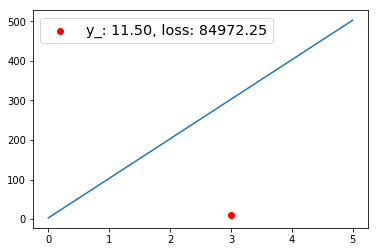

In [34]:
y_ = h(3, params)

plt.plot(np.array([0,1,2,3,4,5]), 100 * np.array([0,1,2,3,4,5]) + 3)
plt.scatter(3, y_, color='red', label='y_: {:.2f}, loss: {:.2f}'.format(y_, j(y_, y)))
plt.legend(loc='upper left', fontsize='x-large')
plt.show()

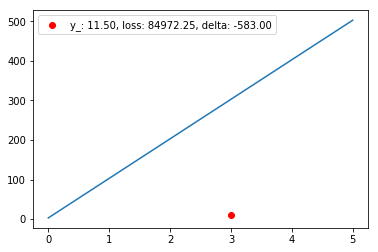

In [35]:
def derivative(y_, y):
    return 2.0 * (y_ - y)
alpha = 0.01

y_ = h(3, params)
delta = derivative(y_, 303)
params[0] -= delta * alpha

plt.plot(np.array([0,1,2,3,4,5]), 100 * np.array([0,1,2,3,4,5]) + 3)
plt.scatter(3, y_, color='red', label='y_: {:.2f}, loss: {:.2f}, delta: {:.2f}'.format(y_, j(y_, y), delta))
plt.legend()
plt.show()

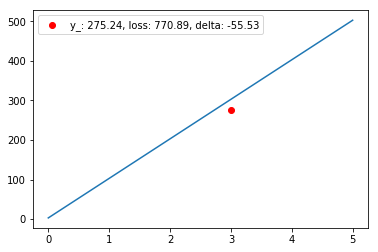

In [73]:
y_ = h(3, params)
delta = derivative(y_, 303)
params[0] -= delta * alpha

plt.plot(np.array([0,1,2,3,4,5]), 100 * np.array([0,1,2,3,4,5]) + 3)
plt.scatter(3, y_, color='red', label='y_: {:.2f}, loss: {:.2f}, delta: {:.2f}'.format(y_, j(y_, y), delta))
plt.legend()
plt.show()

# Backprop의 concept

## Chain-rule

* $model = \sigma(f(x)), f(x) = w_1x + b, \sigma(x) = \frac{1}{1+e^{-x}}$이라는 함수가 있다고 가정
* 우리에게 주어진 x, y 정보는 다음과 같다고 가정
 * $x = 3, y = 0.2$
* 우리는 $w_1 = ?, b = ?$을 알아내고 싶음
* 초기 $w_1 = 1.1, b = 0.5, \alpha = 0.01$로 세팅되었다고 가정함
 * $h(x) = \sigma(w_1x + b), w_1 = 1.1, b = 0.5$
* loss function은 $(h(x)-y)^2$라고 가정

* $y = f(g(x))$의 꼴은 다음과 같이 미분된다.
 * $y' = f'(g(x)) *g'(x)$

* 즉, $model = \sigma(f(x))$는 다음과 같이 미분됨.
 * $model' = \sigma'(f(x)) * f'(x)$
 * $\sigma' = \frac{e^{-x}}{(1+e^{-x})^2}$
 * $f' = w_1$
 
 * $model' = \sigma'(f(x)) * f'(x)$

In [74]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def f(x, params):
    w1 = params[0]
    b = params[1]
    return w1 * x + b

def dsigmoid(x):
    return np.exp(-x)/((1+np.exp(-x))**2)

def df(x, parmas):
    return parmas[0]

def h(x, params):
    return sigmoid(f(x, params))
    
def dh(x, params):
    return dsigmoid(f(x, params)) * df(x, params)
    
def j(y_, y):
    return (y_-y)**2

In [28]:
y = 0.2
params = [1.1, 0.5]

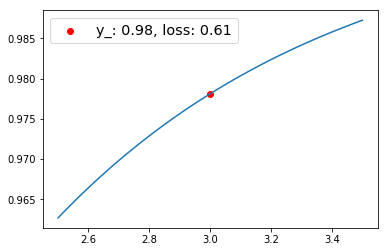

In [29]:
y_ = h(3, params)

x = np.linspace(2.5, 3.5)
plt.plot(x, h(x, params))
plt.scatter(3, y_, color='red', label='y_: {:.2f}, loss: {:.2f}'.format(y_, j(y_, y)))
plt.legend(loc='upper left', fontsize='x-large')
plt.show()

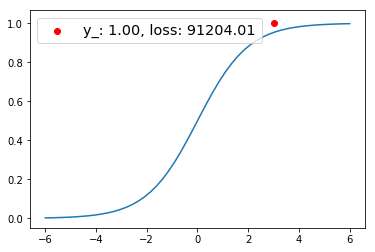

In [20]:
x = np.linspace(-6, 6)
plt.plot(x, sigmoid(x))
plt.scatter(3, y_, color='red', label='y_: {:.2f}, loss: {:.2f}'.format(y_, j(y_, y)))
plt.legend(loc='upper left', fontsize='x-large')
plt.show()

In [15]:
np.linspace(2.5, 3.5)

array([2.5       , 2.52040816, 2.54081633, 2.56122449, 2.58163265,
       2.60204082, 2.62244898, 2.64285714, 2.66326531, 2.68367347,
       2.70408163, 2.7244898 , 2.74489796, 2.76530612, 2.78571429,
       2.80612245, 2.82653061, 2.84693878, 2.86734694, 2.8877551 ,
       2.90816327, 2.92857143, 2.94897959, 2.96938776, 2.98979592,
       3.01020408, 3.03061224, 3.05102041, 3.07142857, 3.09183673,
       3.1122449 , 3.13265306, 3.15306122, 3.17346939, 3.19387755,
       3.21428571, 3.23469388, 3.25510204, 3.2755102 , 3.29591837,
       3.31632653, 3.33673469, 3.35714286, 3.37755102, 3.39795918,
       3.41836735, 3.43877551, 3.45918367, 3.47959184, 3.5       ])

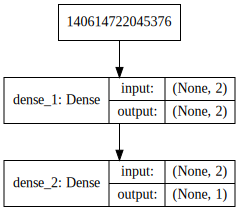

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, True).create(prog='dot', format='svg'))

In [ ]:
y = 303
params = [3.5, 1]